In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
from stDCL import *
from utils import clustering
import argparse

In [2]:
parser = argparse.ArgumentParser(description='stDCL', formatter_class=argparse.ArgumentDefaultsHelpFormatter)

# setting
parser.add_argument('--cuda', type=bool, default=True)
parser.add_argument('--seed', type=int, default=0)
parser.add_argument('--dataset', type=str, default="MERFISH")
parser.add_argument('--datatype', type=str, default="MERFISH")
parser.add_argument('--n_clusters', type=int, default=8)
parser.add_argument('--prelr', type=float, default=0.04)
parser.add_argument('--lr', type=float, default=0.008)
parser.add_argument('--pre_epochs', type=int, default=500)
parser.add_argument('--epochs', type=int, default=800)
parser.add_argument('--noise', type=int, default=0.5)
parser.add_argument('--lambda1', type=float, default=10.0)
parser.add_argument('--lambda2', type=float, default=0.1)
parser.add_argument('--lambda3', type=float, default=0.1)
parser.add_argument('--input', type=int, default=3000)
parser.add_argument('--latent_dim', type=int, default=64)
parser.add_argument('--n_neighbors', type=int, default=12, help='parameter k in spatial graph')
parser.add_argument('--n_neighbors_gene', type=int, default=1, help='parameter k in spatial graph')
parser.add_argument('--clustertype', type=str, default="mclust")
parser.add_argument('--preprocess', type=bool, default=True)
parser.add_argument('--radius', type=int, default=50)
args, unknown = parser.parse_known_args()

In [3]:
args.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = './lib/R'
os.environ['R_USER'] = './lib/python3.8/site-packages/rpy2'

adata = sc.read_h5ad('./MERFISH_mouse_hypothalamic/merfish-0.14.h5ad')
adata.var_names_make_unique()
adata = train(adata, args)

clustering(adata, args, refinement=True)

/home/yuzhuohan/miniconda2/envs/stDCL_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
  0%|          | 0/500 [00:00<?, ?it/s]

Begin to train


100%|██████████| 800/800 [00:12<00:00, 65.98it/s]


Optimization finished


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


In [4]:
ARI = np.round(metrics.adjusted_rand_score(adata.obs['domain'], adata.obs['region']), 4)
NMI = np.round(metrics.normalized_mutual_info_score(adata.obs['domain'], adata.obs['region']), 4)
HS = np.round(metrics.homogeneity_score(adata.obs['domain'], adata.obs['region']), 4)

print('ARI:', ARI)
print('NMI:', NMI)
print('HS:', HS)

ARI: 0.5084
NMI: 0.5389
HS: 0.5514


/home/yuzhuohan/miniconda2/envs/stDCL_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


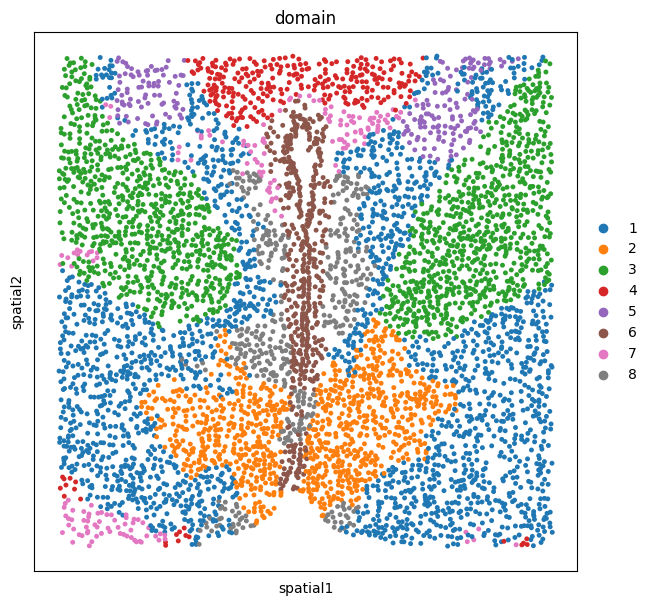

In [5]:
import matplotlib.pyplot as plt
with plt.rc_context({'figure.figsize':(7,7)}):
    sc.pl.embedding(adata,basis='spatial',color=['domain'],show=True,size=50)